# Mileage Prediction


***

In [100]:
#Libraries for data analysis
import pandas as pd
import numpy as np

#plotting libraries
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_palette("GnBu_d")
plt.rcParams['figure.figsize'] = 10, 5
plt.rcParams['figure.dpi'] = 100
plt.rcParams["axes.spines.top"] = True
plt.rcParams["axes.spines.right"] = True

#to ignore warnings
import warnings
warnings.filterwarnings('ignore')

#to split the data
from sklearn.model_selection import train_test_split

#scaling
from sklearn.preprocessing import StandardScaler

# to scale numerical values
from sklearn.impute import SimpleImputer

# to impute missing values in Data
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

# to convert categorical features into numerical feature
from sklearn.pipeline import Pipeline

# to build a data preprocessing pipeline
from sklearn.compose import ColumnTransformer
import os


#Different regression mmodels
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import Ridge


#Polynomial Algorithm
from sklearn.preprocessing import PolynomialFeatures

#metrics
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df= sns.load_dataset("mpg")

In [4]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [11]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')

In [15]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


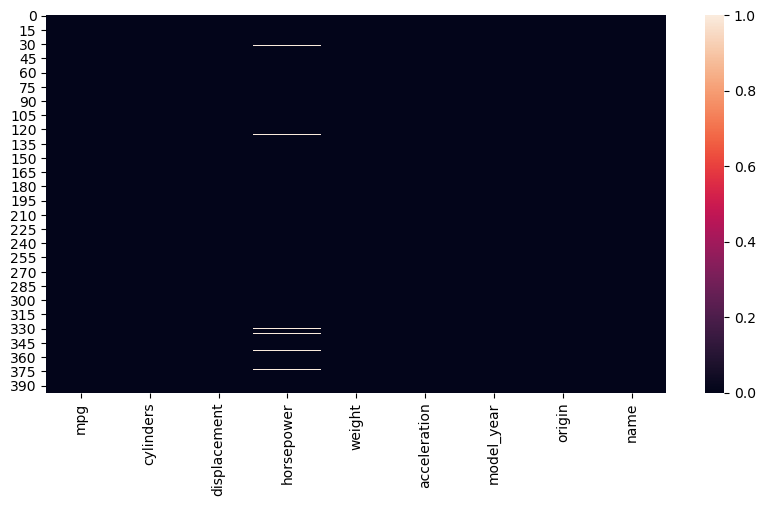

In [28]:
sns.heatmap(data=df.isna())
plt.show()

In [30]:
ORIGIN = df["origin"].value_counts()

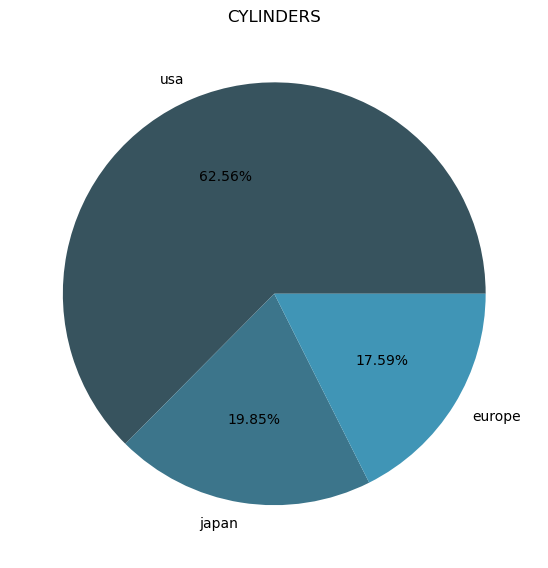

In [31]:
plt.rcParams['figure.figsize'] = 15, 7
plt.pie(ORIGIN, labels=ORIGIN.index,autopct="%.2f%%")
plt.title("CYLINDERS")
plt.show()

In [35]:
num_data = df.select_dtypes(include=["float64","int64"])

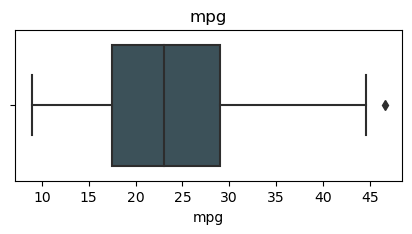

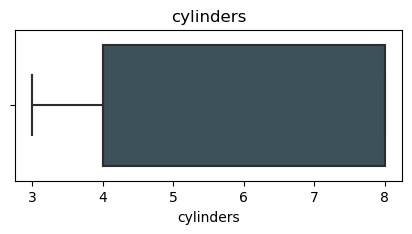

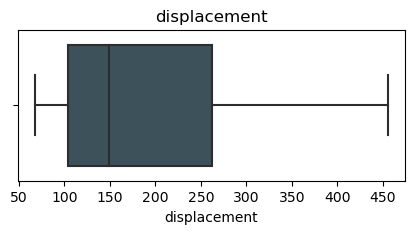

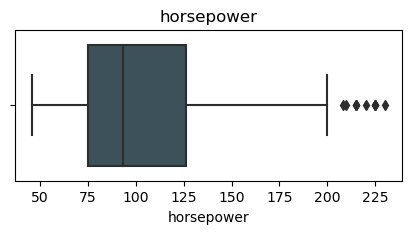

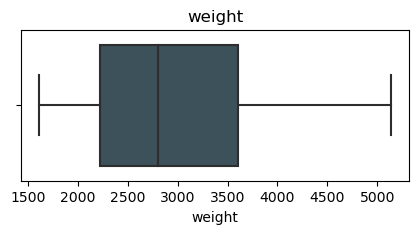

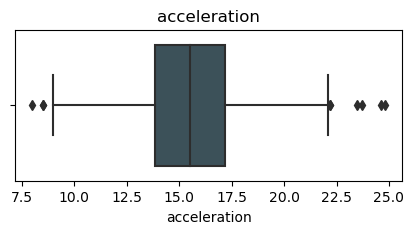

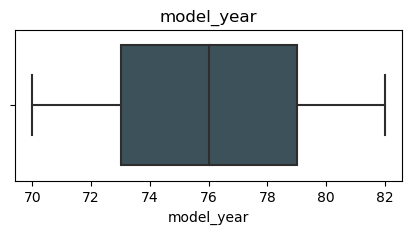

In [41]:
plt.rcParams['figure.figsize'] = 5, 2
for col in num_data.columns:
    sns.boxplot(df[col])
    plt.title(col)
    plt.show()

***
**As we can see there are outliers in acceleration and horsepower, so we need to handle it**

***

### Created a function for IQR to handle outliers

In [54]:
def outlier(df, column):
    df[column].describe
    Q1=df[column].describe().loc["25%"]
    Q3=df[column].describe().loc["75%"]
    IQR_hp=Q3-Q1
    top_limit=Q3+ 1.5*IQR_hp
    bottom_limit=Q1- 1.5*IQR_hp
    return df[ (df[column]>=bottom_limit) & (df[column]<=top_limit) ]

In [58]:
df = outlier(df,"acceleration")
df = outlier(df,"horsepower")

### Checking the correlation with the help of heat map

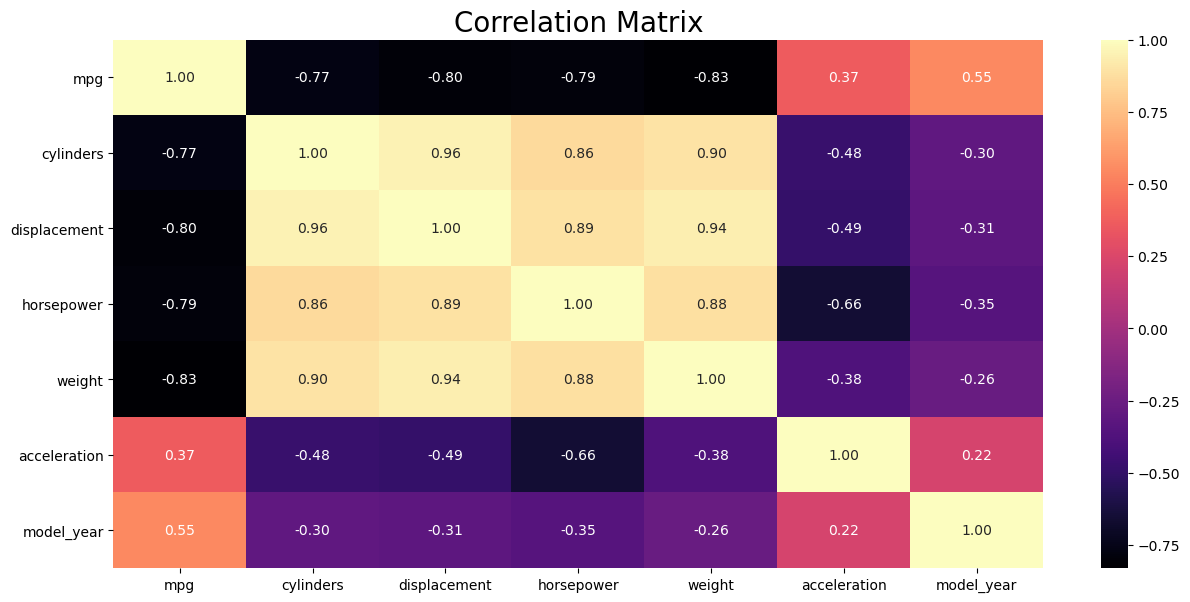

In [61]:
plt.rcParams['figure.figsize'] = 15, 7
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap = "magma" )
plt.title("Correlation Matrix", fontsize=20)
plt.show()

### Creating a pairplot to see the relation of features with the target value that is mpg

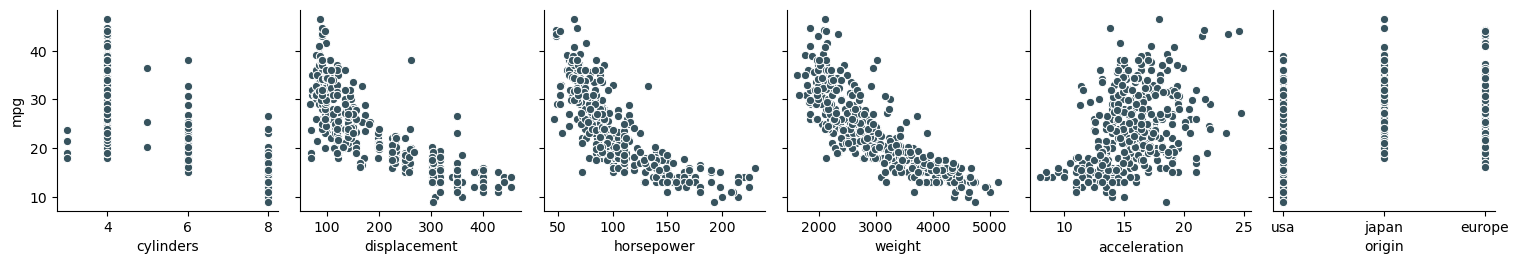

In [46]:
sns.pairplot(df, x_vars=['cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'origin'], y_vars=["mpg"])

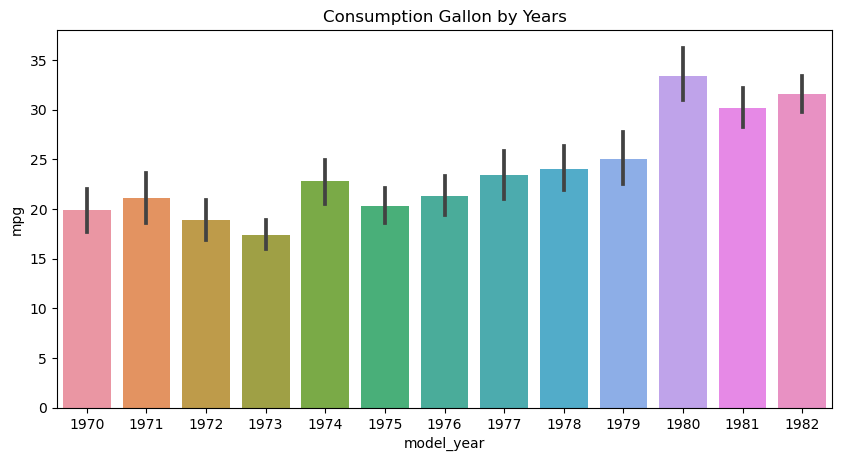

In [62]:
plt.figure(figsize=[10, 5])
sns.barplot(x=df['model_year']+1900, y=df['mpg'])
plt.title('Consumption Gallon by Years')
plt.show()

### Dropping the columns which have no effect on mileage.

In [63]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')

In [64]:
df = df.drop(columns=["name"], axis=1)

### Making a function to find out the Root mean squared error and Accuracy(r2 score)

In [67]:
def rmse(y, y_hat):
    return np.sqrt(mean_squared_error(y, y_hat))

def model_report(models, X_train, X_test, y_train, y_test):
    for name, model in models:
        model.fit(X_train, y_train)
        y_hat_train = model.predict(X_train)
        y_hat_test  = model.predict(X_test)
        print("_"*80)
        print(f"Report For {name}".center(80))
        print()
        print(f"Training RMSE Error: {rmse(y_train, y_hat_train):.2f}" )
        print(f"Test     RMSE Error: {rmse(y_test, y_hat_test):.2f}")
        print()
        print(f"Training Accuracy: {r2_score(y_train, y_hat_train):.2f}")
        print(f"Test     Accuracy: {r2_score(y_test, y_hat_test):.2f}")
        print('\n\n')

### Splitting the data into training and target using Stratified Sampling

In [82]:
X= df.drop(columns = ["mpg","model_year"],axis =1)
y=df["mpg"]

In [83]:
#importing module for Stratified samplig
from sklearn.model_selection import StratifiedShuffleSplit

##### Made a function for stratifeid sampling

In [132]:
def stratified_sample(X, y, col, test_size=0.2, random_state=100):
    split = StratifiedShuffleSplit(n_splits=1, test_size=test_size,
                                  random_state=random_state)
    for train_idxs, test_idxs in split.split(X, X[col]):
        X_train = X.iloc[train_idxs]
        y_train = y.iloc[train_idxs]
        X_test  = X.iloc[test_idxs]
        y_test  = y.iloc[test_idxs]
    return X_train, X_test, y_train, y_test

In [133]:
X_train, X_test, y_train, y_test = stratified_sample(X, y, 'origin')

In [134]:
X_train.columns

Index(['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration',
       'origin'],
      dtype='object')

#### Creating a pipleine and as we can see displacement ,horsepower and weight making almost polynomial relation with mpg so we have used Polynomial features with degree 2

In [160]:
cat_attr=["cylinders","origin"]
poly_attr =["displacement","horsepower","weight"] 
num_attr=["acceleration"]

In [163]:
num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='median')), #T1
        ('poly', PolynomialFeatures(degree=2, include_bias=False)),
        ('standard scaler', StandardScaler()), #T2
        
    ])
poly_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')), #T1
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('standard scaler', StandardScaler())
])
final_pipeline = ColumnTransformer([
        # (name, Transformer, column_list)
        ("numerical pipeline", num_pipeline, num_attr),
        ("polynomial pipeline",poly_pipeline,poly_attr),
        ("categorical pipeline", OneHotEncoder(), cat_attr),
        
    ])

X_train_tr = final_pipeline.fit_transform(X_train)
X_test_tr  =  final_pipeline.transform(X_test)
models = [
        ('Linear Regression', LinearRegression()),
        
        ('sgd', SGDRegressor())
       ]

model_report(models, X_train_tr, X_test_tr, y_train, y_test)

________________________________________________________________________________
                          Report For Linear Regression                          

Training RMSE Error: 3.50
Test     RMSE Error: 3.31

Training Accuracy: 0.79
Test     Accuracy: 0.81



________________________________________________________________________________
                                 Report For sgd                                 

Training RMSE Error: 3.70
Test     RMSE Error: 3.61

Training Accuracy: 0.76
Test     Accuracy: 0.78





### Now doing hyperparameter tuning  and checking the Accuracy

##### Using GridCV to find best parameter

In [168]:
from sklearn.model_selection import GridSearchCV


In [190]:
param_grid = [
      {'eta0':[0.01,0.001,0.0001,0.1],
       
       'tol':[1e-3,0.0001,0.001,0.01,0.1],
       "early_stopping" : [True]
       
       }
] 
    


grid_search = GridSearchCV(SGDRegressor(early_stopping=True), param_grid, cv=5,
                      scoring="r2", return_train_score=True)

grid_search.fit(X_train_tr, y_train)

GridSearchCV(cv=5, estimator=SGDRegressor(early_stopping=True),
             param_grid=[{'early_stopping': [True],
                          'eta0': [0.01, 0.001, 0.0001, 0.1],
                          'tol': [0.001, 0.0001, 0.001, 0.01, 0.1]}],
             return_train_score=True, scoring='r2')

In [191]:
best_model = grid_search.best_estimator_

In [192]:
best_parameters = grid_search.best_params_
print(best_parameters)

{'early_stopping': True, 'eta0': 0.01, 'tol': 0.001}


In [193]:
result = grid_search.cv_results_



train_scores = np.round(result['mean_train_score'], 2)
test_scores  = np.round(result['mean_test_score'], 2)
parameters = result['params']


scores = [ (tr, ts, pr) for tr, ts, pr in zip(train_scores, test_scores, parameters) ]

scores.sort(key=lambda x:x[1], reverse=True)

strformat = "|{:<5}|{:^20}| {:^20}| {}|\n{}\n"
lb =  '_'*110
print(strformat.format("", "Training Score", "Test Score", "Parameters", lb))
for ix, (tr, ts, pr) in enumerate(scores[:10]):
    print(strformat.format(ix+1, tr, ts, pr, lb))

|     |   Training Score   |      Test Score     | Parameters|
______________________________________________________________________________________________________________

|1    |        0.73        |         0.69        | {'early_stopping': True, 'eta0': 0.01, 'tol': 0.001}|
______________________________________________________________________________________________________________

|2    |        0.72        |         0.68        | {'early_stopping': True, 'eta0': 0.01, 'tol': 0.0001}|
______________________________________________________________________________________________________________

|3    |        0.72        |         0.68        | {'early_stopping': True, 'eta0': 0.01, 'tol': 0.001}|
______________________________________________________________________________________________________________

|4    |        0.73        |         0.68        | {'early_stopping': True, 'eta0': 0.01, 'tol': 0.01}|
_____________________________________________________________________

### Now again checking the accuracy using hyperparameter in SGD model 

In [206]:
num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='median')), #T1
        ('poly', PolynomialFeatures(degree=2, include_bias=False)),
        ('standard scaler', StandardScaler()), #T2
        
    ])
poly_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')), #T1
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('standard scaler', StandardScaler())
])
final_pipeline = ColumnTransformer([
        # (name, Transformer, column_list)
        ("numerical pipeline", num_pipeline, num_attr),
        ("polynomial pipeline",poly_pipeline,poly_attr),
        ("categorical pipeline", OneHotEncoder(), cat_attr),
        
    ])

X_train_tr = final_pipeline.fit_transform(X_train)
X_test_tr  =  final_pipeline.transform(X_test)
models = [
        ('Linear Regression', LinearRegression()),
        
        ('sgd', SGDRegressor(eta0=0.01,tol=0.001,early_stopping=True ))
       ]

model_report(models, X_train_tr, X_test_tr, y_train, y_test)

________________________________________________________________________________
                          Report For Linear Regression                          

Training RMSE Error: 3.50
Test     RMSE Error: 3.31

Training Accuracy: 0.79
Test     Accuracy: 0.81



________________________________________________________________________________
                                 Report For sgd                                 

Training RMSE Error: 4.03
Test     RMSE Error: 4.04

Training Accuracy: 0.72
Test     Accuracy: 0.72





***
**Tried first time with hyperparmater tuning, but the conclusion was the accuracy of SGD model with the hyperparameter comes out to be less as compared without it.**


***